In [20]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

import visuals as vs

%matplotlib inline

In [21]:
# Load the Red Wines dataset
data = pd.read_csv("D:\Predict Wine Quality\dataset\WineQT.csv")

# Display the first five records
display(data.head(n=5))

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [22]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
Id                      False
dtype: bool

In [23]:
data.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075

In [24]:
n_wines = data.shape[0]

# Number of wines with quality rating above 6
quality_above_6 = data.loc[(data['quality'] > 6)]
n_above_6 = quality_above_6.shape[0]

# Number of wines with quality rating below 5
quality_below_5 = data.loc[(data['quality'] < 5)]
n_below_5 = quality_below_5.shape[0]

# Number of wines with quality rating between 5 to 6
quality_between_5 = data.loc[(data['quality'] >= 5) & (data['quality'] <= 6)]
n_between_5 = quality_between_5.shape[0]

# Percentage of wines with quality rating above 6
greater_percent = n_above_6*100/n_wines

# Print the results
print("Total number of wine data: {}".format(n_wines))
print("Wines with rating 7 and above: {}".format(n_above_6))
print("Wines with rating less than 5: {}".format(n_below_5))
print("Wines with rating 5 and 6: {}".format(n_between_5))
print("Percentage of wines with quality 7 and above: {:.2f}%".format(greater_percent))

# Some more additional data analysis
display(np.round(data.describe()))


Total number of wine data: 1143
Wines with rating 7 and above: 159
Wines with rating less than 5: 39
Wines with rating 5 and 6: 945
Percentage of wines with quality 7 and above: 13.91%


fixed acidity  volatile acidity  citric acid  residual sugar  \
count         1143.0            1143.0       1143.0          1143.0   
mean             8.0               1.0          0.0             3.0   
std              2.0               0.0          0.0             1.0   
min              5.0               0.0          0.0             1.0   
25%              7.0               0.0          0.0             2.0   
50%              8.0               1.0          0.0             2.0   
75%              9.0               1.0          0.0             3.0   
max             16.0               2.0          1.0            16.0   

       chlorides  free sulfur dioxide  total sulfur dioxide  density      pH  \
count     1143.0               1143.0                1143.0   1143.0  1143.0   
mean         0.0                 16.0                  46.0      1.0     3.0   
std          0.0                 10.0                  33.0      0.0     0.0   
min          0.0                  1.0                   6.0      1.0     3.0   
25%          0.0                  7.0                  21.0      1.0     3.0   
50%          0.0                 13.0                  37.0      1.0     3.0   
75%          0.0                 21.0                  61.0      1.0     3.0   
max          1.0                 68.0                 289.0      1.0     4.0   

       sulphates  alcohol  quality      Id  
count     1143.0   1143.0   1143.0  1143.0  
mean         1.0     10.0      6.0   805.0  
std          0.0      1.0      1.0   464.0  
min          0.0      8.0      3.0     0.0  
25%          1.0     10.0      5.0   411.0  
50%          1.0     10.0      6.0   794.0  
75%          1.0     11.0      6.0  1210.0  
max          2.0     15.0      8.0  1597.0

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (6).

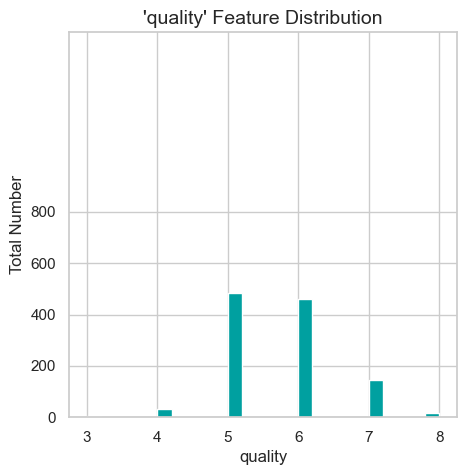

In [25]:
# Visualize skewed continuous features of original data
vs.distribution(data, "quality")

In [26]:
display(np.round(data.describe()))

fixed acidity  volatile acidity  citric acid  residual sugar  \
count         1143.0            1143.0       1143.0          1143.0   
mean             8.0               1.0          0.0             3.0   
std              2.0               0.0          0.0             1.0   
min              5.0               0.0          0.0             1.0   
25%              7.0               0.0          0.0             2.0   
50%              8.0               1.0          0.0             2.0   
75%              9.0               1.0          0.0             3.0   
max             16.0               2.0          1.0            16.0   

       chlorides  free sulfur dioxide  total sulfur dioxide  density      pH  \
count     1143.0               1143.0                1143.0   1143.0  1143.0   
mean         0.0                 16.0                  46.0      1.0     3.0   
std          0.0                 10.0                  33.0      0.0     0.0   
min          0.0                  1.0                   6.0      1.0     3.0   
25%          0.0                  7.0                  21.0      1.0     3.0   
50%          0.0                 13.0                  37.0      1.0     3.0   
75%          0.0                 21.0                  61.0      1.0     3.0   
max          1.0                 68.0                 289.0      1.0     4.0   

       sulphates  alcohol  quality      Id  
count     1143.0   1143.0   1143.0  1143.0  
mean         1.0     10.0      6.0   805.0  
std          0.0      1.0      1.0   464.0  
min          0.0      8.0      3.0     0.0  
25%          1.0     10.0      5.0   411.0  
50%          1.0     10.0      6.0   794.0  
75%          1.0     11.0      6.0  1210.0  
max          2.0     15.0      8.0  1597.0

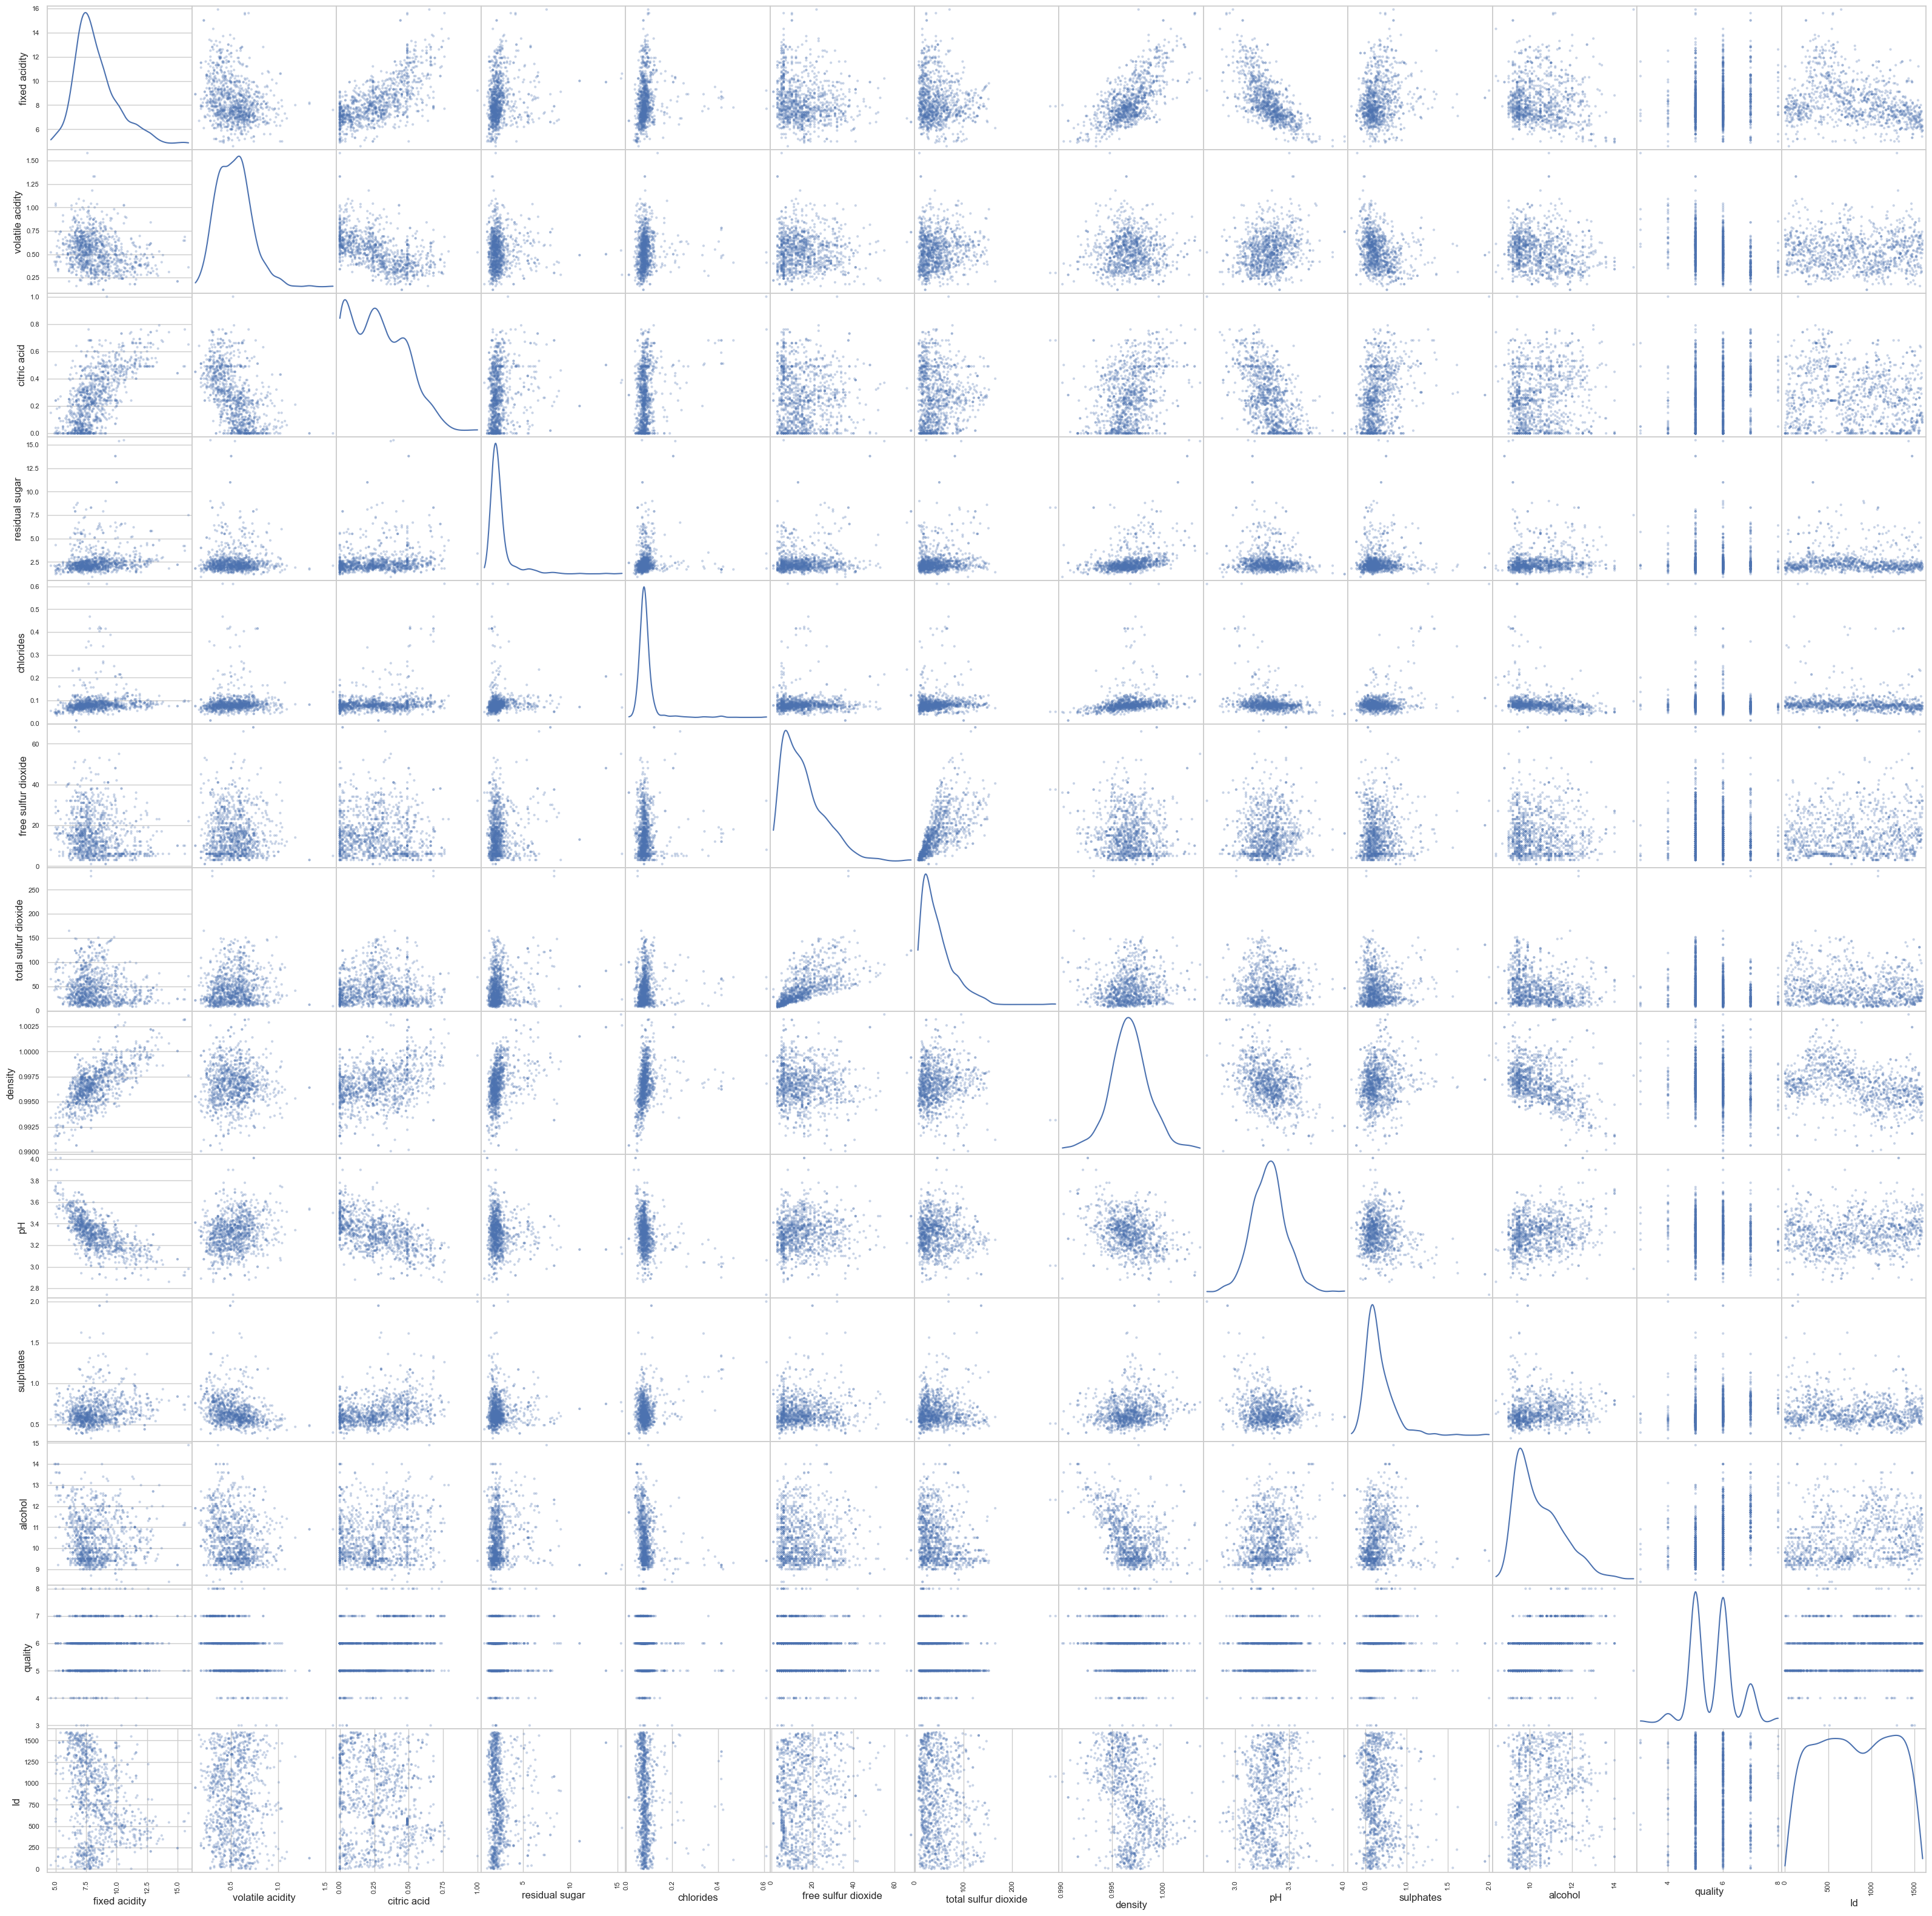

In [27]:
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (40,40), diagonal = 'kde');

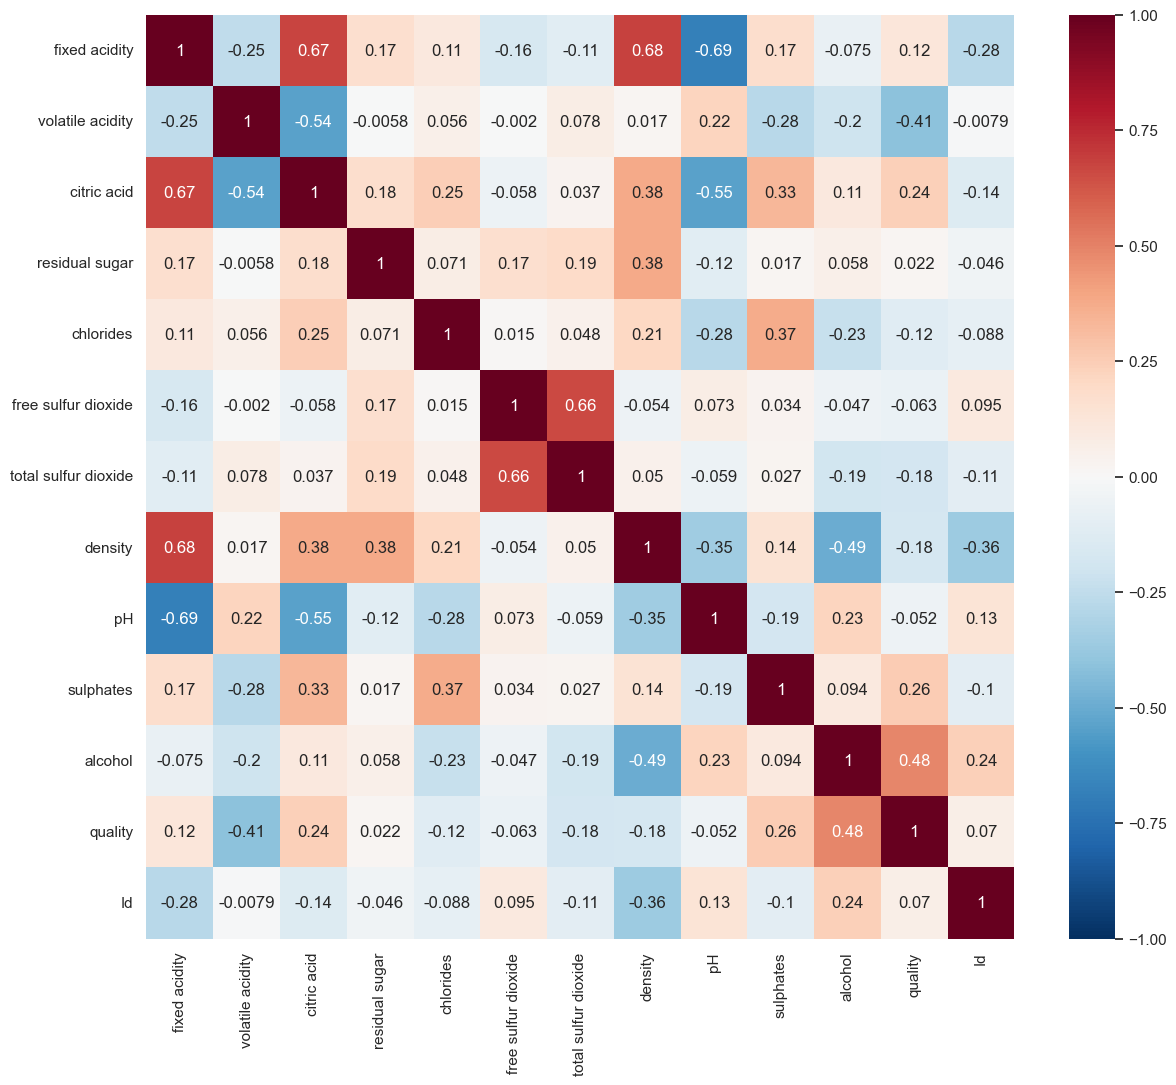

In [28]:
correlation = data.corr()
# display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

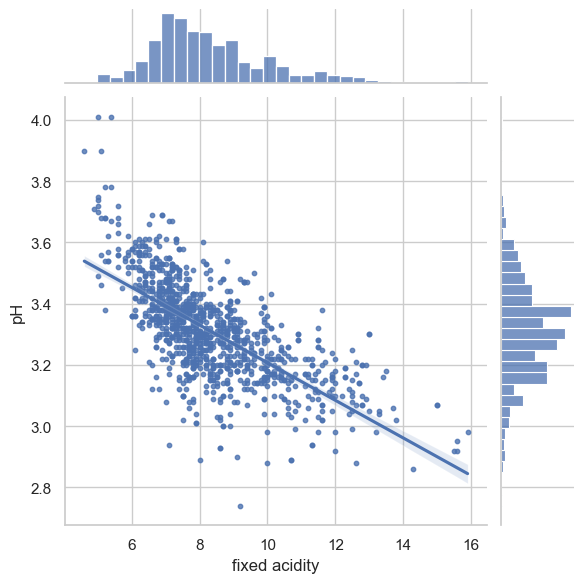

In [34]:
#Visualize the co-relation between pH and fixed Acidity

#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = data[['pH', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.histplot)

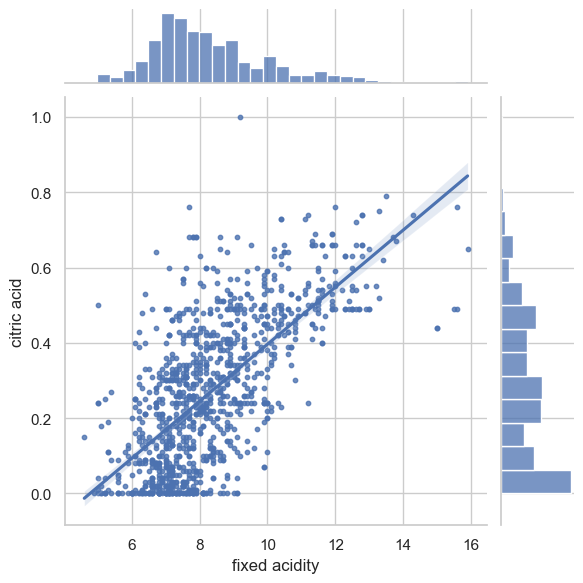

In [35]:
fixedAcidity_citricAcid = data[['citric acid', 'fixed acidity']]
g = sns.JointGrid(x="fixed acidity", y="citric acid", data=fixedAcidity_citricAcid, height=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.histplot)

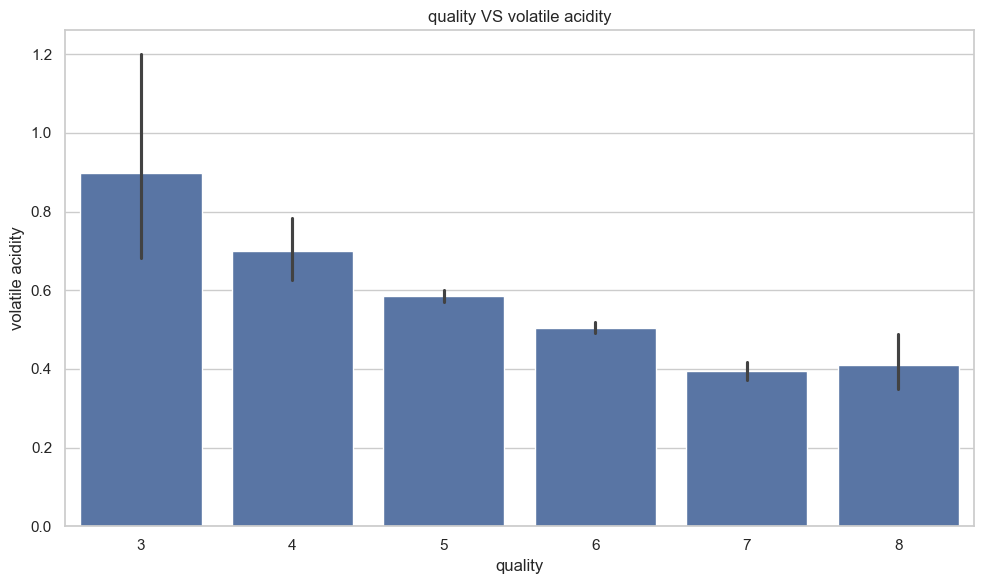

<Figure size 640x480 with 0 Axes>

In [37]:
volatileAcidity_quality=data[['volatile acidity','quality']]
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data=volatileAcidity_quality, ax=axs)
plt.title('quality VS volatile acidity')

plt.tight_layout()
plt.show()
plt.gcf().clear()

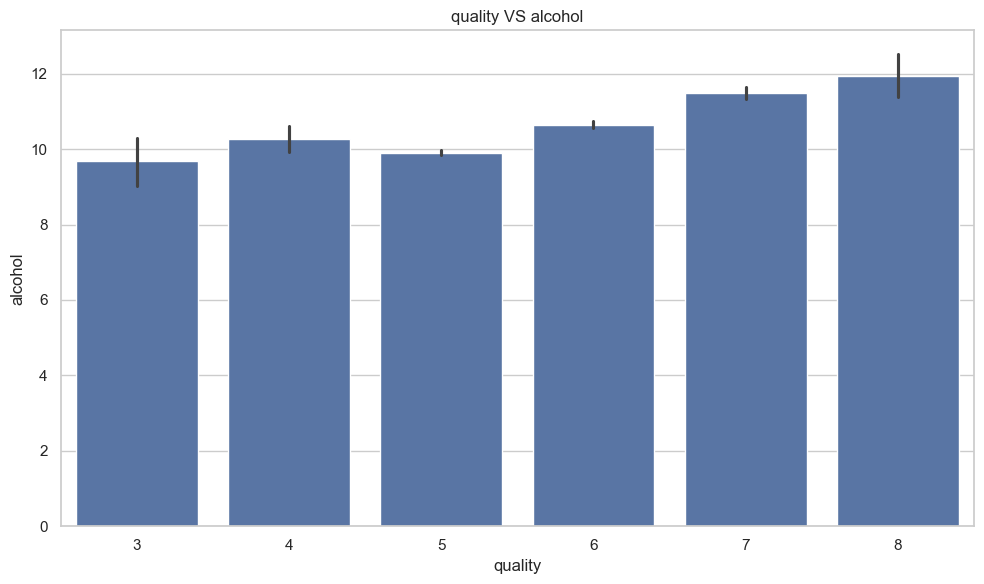

<Figure size 640x480 with 0 Axes>

In [38]:
quality_alcohol=data[['alcohol','quality']]
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=quality_alcohol, ax=axs)
plt.title('quality VS alcohol')

plt.tight_layout()
plt.show()
plt.gcf().clear()

In [39]:
# For each feature find the data points with extreme high or low values
for feature in data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], q=25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], q=75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
    
    # OPTIONAL: Select the indices for data points you wish to remove
    outliers = []
    # Remove the outliers, if any were specified
    good_data = data.drop(data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'fixed acidity':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
145           12.8             0.300         0.74             2.6      0.095   
146           12.8             0.300         0.74             2.6      0.095   
170           15.0             0.210         0.44             2.2      0.075   
171           15.0             0.210         0.44             2.2      0.075   
188           12.5             0.560         0.49             2.4      0.064   
211           13.3             0.340         0.52             3.2      0.094   
234           13.4             0.270         0.62             2.6      0.082   
240           12.5             0.280         0.54             2.3      0.082   
244           13.8             0.490         0.67             3.0      0.093   
248           13.5             0.530         0.79             4.8      0.120   
254           12.6             0.380         0.66             2.6      0.088   
258           12.5             0.460         0.63             2.0      0.071   
259           12.8             0.615         0.66             5.8      0.083   
260           12.8             0.615         0.66             5.8      0.083   
272           13.7             0.415         0.68             2.9      0.085   
279           12.2             0.480         0.54             2.6      0.085   
284           12.5             0.460         0.49             4.5      0.070   
301           12.8             0.840         0.63             2.4      0.088   
304           12.3             0.390         0.63             2.3      0.091   
306           12.3             0.390         0.63             2.3      0.091   
310           12.6             0.310         0.72             2.2      0.072   
311           15.6             0.685         0.76             3.7      0.100   
313           12.5             0.380         0.60             2.6      0.081   
332           13.0             0.320         0.65             2.6      0.093   
334           12.5             0.370         0.55             2.6      0.083   
361           13.3             0.290         0.75             2.8      0.084   
367           12.5             0.600         0.49             4.3      0.100   
382           12.9             0.350         0.49             5.8      0.066   
388           14.3             0.310         0.74             1.8      0.075   
392           12.4             0.350         0.49             2.6      0.079   
397           15.5             0.645         0.49             4.2      0.095   
399           15.6             0.645         0.49             4.2      0.095   
400           13.0             0.470         0.49             4.3      0.085   
401           12.7             0.600         0.49             2.8      0.075   
404           13.0             0.470         0.49             4.3      0.085   
405           12.7             0.600         0.49             2.8      0.075   
415           12.3             0.500         0.49             2.2      0.089   
416           12.3             0.500         0.49             2.2      0.089   
425           12.4             0.400         0.51             2.0      0.059   
433           13.2             0.380         0.55             2.7      0.081   
462           15.9             0.360         0.65             7.5      0.096   
584           12.9             0.500         0.55             2.8      0.072   
586           12.6             0.410         0.54             2.8      0.103   
864           12.6             0.390         0.49             2.5      0.080   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
145                  9.0                  28.0  0.99940  3.20       0.77   
146                  9.0                  28.0  0.99940  3.20       0.77   
170                 10.0                  24.0  1.00005  3.07       0.84   
171                 10.0                  24.0  1.00005  3.07       0.84   
188                  5.0

Data points considered outliers for the feature 'volatile acidity':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
66              5.0             1.020         0.04             1.4      0.045   
83              7.3             1.070         0.09             1.7      0.178   
87              8.2             1.330         0.00             1.7      0.081   
88              8.1             1.330         0.00             1.8      0.082   
92              7.9             1.040         0.05             2.2      0.084   
142             6.9             1.090         0.06             2.1      0.061   
396             5.0             1.040         0.24             1.6      0.050   
497            10.6             1.020         0.43             2.9      0.076   
502             8.4             1.035         0.15             6.0      0.073   
506            10.6             1.025         0.43             2.8      0.080   
891             6.3             1.020         0.00             2.0      0.083   
922             7.6             1.580         0.00             2.1      0.137   
931             8.0             1.180         0.21             1.9      0.083   
1044            6.7             1.040         0.08             2.3      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
66                   41.0                  85.0  0.99380  3.75       0.48   
83                   10.0                  89.0  0.99620  3.30       0.57   
87                    3.0                  12.0  0.99640  3.53       0.49   
88                    3.0                  12.0  0.99640  3.54       0.48   
92                   13.0                  29.0  0.99590  3.22       0.55   
142                  12.0                  31.0  0.99480  3.51       0.43   
396                  32.0                  96.0  0.99340  3.74       0.62   
497                  26.0                  88.0  0.99840  3.08       0.57   
502                  11.0                  54.0  0.99900  3.37       0.49   
506                  21.0                  84.0  0.99850  3.06       0.57   
891                  17.0                  24.0  0.99437  3.59       0.55   
922                   5.0                   9.0  0.99476  3.50       0.40   
931                  14.0                  41.0  0.99532  3.34       0.47   
1044                 19.0                  32.0  0.99648  3.52       0.57   

      alcohol  quality    Id  
66       10.5        4    94  
83        9.0        5   120  
87       10.9        5   126  
88       10.9        5   127  
92        9.9        6   134  
142      11.4        4   199  
396      11.5        5   553  
497      10.1        6   700  
502       9.9        5   705  
506      10.1        5   710  
891      11.2        4  1261  
922      10.9        3  1299  
931      10.5        5  1312  
1044     11.0        4  1467

Data points considered outliers for the feature 'citric acid':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
103            9.2              0.52          1.0             3.4       0.61   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
103                 32.0                  69.0   0.9996  2.74        2.0   

     alcohol  quality   Id  
103      9.4        4  151

Data points considered outliers for the feature 'residual sugar':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
25              7.8             0.645         0.00            5.50      0.086   
28              7.3             0.450         0.36            5.90      0.074   
45              7.2             0.725         0.05            4.65      0.086   
46              7.2             0.725         0.05            4.65      0.086   
106             7.1             0.430         0.42            5.50      0.071   
...             ...               ...          ...             ...        ...   
1082            6.9             0.840         0.21            4.10      0.074   
1099            6.2             0.520         0.08            4.40      0.071   
1106            6.3             0.680         0.01            3.70      0.103   
1111            6.9             0.630         0.33            6.70      0.235   
1128            6.2             0.700         0.15            5.10      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
25                    5.0                  18.0  0.99860  3.40       0.55   
28                   12.0                  87.0  0.99780  3.33       0.83   
45                    4.0                  11.0  0.99620  3.41       0.39   
46                    4.0                  11.0  0.99620  3.41       0.39   
106                  28.0                 128.0  0.99730  3.42       0.71   
...                   ...                   ...      ...   ...        ...   
1082                 16.0                  65.0  0.99842  3.53       0.72   
1099                 11.0                  32.0  0.99646  3.56       0.63   
1106                 32.0                  54.0  0.99586  3.51       0.66   
1111                 66.0                 115.0  0.99787  3.22       0.56   
1128                 13.0                  27.0  0.99622  3.54       0.60   

      alcohol  quality    Id  
25       9.60        6    35  
28      10.50        5    40  
45      10.90        5    64  
46      10.90        5    65  
106     10.50        5   155  
...       ...      ...   ...  
1082     9.25        6  1515  
1099    11.60        6  1540  
1106    11.30        6  1552  
1111     9.50        5  1558  
1128    11.90        6  1577  

[110 rows x 13 columns]

Data points considered outliers for the feature 'chlorides':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
13              7.9              0.32         0.51             1.8      0.341   
30              7.5              0.49         0.20             2.6      0.332   
75              7.8              0.41         0.68             1.7      0.467   
83              7.3              1.07         0.09             1.7      0.178   
103             9.2              0.52         1.00             3.4      0.610   
...             ...               ...          ...             ...        ...   
1053            9.9              0.50         0.50            13.8      0.205   
1064            7.1              0.22         0.49             1.8      0.039   
1111            6.9              0.63         0.33             6.7      0.235   
1122            6.4              0.36         0.53             2.2      0.230   
1123            6.4              0.38         0.14             2.2      0.038   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
13                   17.0                  56.0  0.99690  3.04       1.08   
30                    8.0                  14.0  0.99680  3.21       0.90   
75                   18.0                  69.0  0.99730  3.08       1.31   
83                   10.0                  89.0  0.99620  3.30       0.57   
103                  32.0                  69.0  0.99960  2.74       2.00   
...                   ...                   ...      ...   ...        ...   
1053                 48.0                  82.0  1.00242  3.16       0.75   
1064                  8.0                  18.0  0.99344  3.39       0.56   
1111                 66.0                 115.0  0.99787  3.22       0.56   
1122                 19.0                  35.0  0.99340  3.37       0.93   
1123                 15.0                  25.0  0.99514  3.44       0.65   

      alcohol  quality    Id  
13        9.2        6    19  
30       10.5        6    42  
75        9.3        5   106  
83        9.0        5   120  
103       9.4        4   151  
...       ...      ...   ...  
1053      8.8        5  1476  
1064     12.4        6  1490  
1111      9.5        5  1558  
1122     12.4        6  1570  
1123     11.1        6  1571  

[77 rows x 13 columns]

Data points considered outliers for the feature 'free sulfur dioxide':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
275             6.6             0.735         0.02            7.90      0.122   
278             6.6             0.735         0.02            7.90      0.122   
351             7.2             0.340         0.32            2.50      0.090   
450             7.9             0.350         0.21            1.90      0.073   
480             8.3             0.780         0.10            2.60      0.081   
654             8.6             0.220         0.36            1.90      0.064   
655             9.4             0.240         0.33            2.30      0.061   
690             7.3             0.520         0.32            2.10      0.070   
820             8.5             0.180         0.51            1.75      0.071   
831             6.5             0.610         0.00            2.20      0.095   
871             7.8             0.815         0.01            2.60      0.074   
887             7.5             0.590         0.22            1.80      0.082   
919             6.6             0.630         0.00            4.30      0.093   
965             7.4             0.640         0.17            5.40      0.168   
1022           10.2             0.540         0.37           15.40      0.214   
1051            9.9             0.500         0.50           13.80      0.205   
1053            9.9             0.500         0.50           13.80      0.205   
1111            6.9             0.630         0.33            6.70      0.235   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
275                  68.0                 124.0  0.99940  3.47       0.53   
278                  68.0                 124.0  0.99940  3.47       0.53   
351                  43.0                 113.0  0.99660  3.32       0.79   
450                  46.0                 102.0  0.99640  3.27       0.58   
480                  45.0                  87.0  0.99830  3.48       0.53   
654                  53.0                  77.0  0.99604  3.47       0.87   
655                  52.0                  73.0  0.99786  3.47       0.90   
690                  51.0                  70.0  0.99418  3.34       0.82   
820                  45.0                  88.0  0.99524  3.33       0.76   
831                  48.0                  59.0  0.99541  3.61       0.70   
871                  48.0                  90.0  0.99621  3.38       0.62   
887                  43.0                  60.0  0.99499  3.10       0.42   
919                  51.0                  77.5  0.99558  3.20       0.45   
965                  52.0                  98.0  0.99736  3.28       0.50   
1022                 55.0                  95.0  1.00369  3.18       0.77   
1051                 48.0                  82.0  1.00242  3.16       0.75   
1053                 48.0                  82.0  1.00242  3.16       0.75   
1111                 66.0                 115.0  0.99787  3.22       0.56   

      alcohol  quality    Id  
275       9.9        5   396  
278       9.9        5   400  
351      11.1        5   497  
450       9.5        5   634  
480      10.0        5   678  
654      11.0        7   925  
655      10.2        6   926  
690      12.9        6   982  
820      11.8        7  1156  
831      11.5        6  1175  
871      10.8        5  1231  
887       9.2        5  1256  
919       9.5        5  1296  
965       9.5        5  1358  
1022      9.0        6  1434  
1051      8.8        5  1474  
1053      8.8        5  1476  
1111      9.5        5  1558

Data points considered outliers for the feature 'total sulfur dioxide':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
59              8.6             0.490         0.28             1.9      0.110   
61              9.3             0.390         0.44             2.1      0.107   
63              7.9             0.520         0.26             1.9      0.079   
64              8.6             0.490         0.28             1.9      0.110   
90              8.0             0.745         0.56             2.0      0.118   
99              8.1             0.670         0.55             1.8      0.117   
106             7.1             0.430         0.42             5.5      0.071   
107             7.1             0.430         0.42             5.5      0.070   
108             7.1             0.430         0.42             5.5      0.071   
135             7.9             0.500         0.33             2.0      0.084   
136             8.2             0.500         0.35             2.9      0.077   
225             8.6             0.470         0.30             3.0      0.076   
249             6.1             0.210         0.40             1.4      0.066   
275             6.6             0.735         0.02             7.9      0.122   
278             6.6             0.735         0.02             7.9      0.122   
288             8.8             0.520         0.34             2.7      0.087   
289             8.6             0.725         0.24             6.6      0.117   
291             7.0             0.580         0.12             1.9      0.091   
366             8.5             0.655         0.49             6.1      0.122   
370             9.3             0.400         0.49             2.5      0.085   
421             6.6             0.390         0.49             1.7      0.070   
452             9.6             0.880         0.28             2.4      0.086   
453             9.5             0.885         0.27             2.3      0.084   
460             6.7             0.420         0.27             8.6      0.068   
485             9.8             0.980         0.32             2.3      0.078   
491             9.0             0.480         0.32             2.8      0.084   
492             9.0             0.470         0.31             2.7      0.084   
514             7.1             0.310         0.30             2.2      0.053   
529             9.2             0.530         0.24             2.6      0.078   
553             9.4             0.685         0.26             2.4      0.082   
554             9.5             0.570         0.27             2.3      0.082   
568             8.8             0.640         0.17             2.9      0.084   
760             7.9             0.300         0.68             8.3      0.050   
761             7.9             0.300         0.68             8.3      0.050   
994             7.9             0.690         0.21             2.1      0.080   
1011            7.7             0.640         0.21             2.2      0.077   
1066            7.7             0.540         0.26             1.9      0.089   
1112            7.8             0.600         0.26             2.0      0.080   
1113            7.8             0.600         0.26             2.0      0.080   
1114            7.8             0.600         0.26             2.0      0.080   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
59                   20.0                 136.0  0.99720  2.93       1.95   
61                   34.0                 125.0  0.99780  3.14       1.22   
63                   42.0                 140.0  0.99640  3.23       0.54   
64                   20.0                 136.0  0.99720  2.93       1.95   
90                   30.0                 134.0  0.99680  3.24       0.66   
99                   32.0                 141.0  0.99680  3.17       0.62   
106                  28.0                 128.0  0.99730  3.42       0.71   
107                  29.0                 129.0  0.99730  3.42      

Data points considered outliers for the feature 'density':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
96              5.2             0.340         0.00            1.80      0.050   
98              5.2             0.340         0.00            1.80      0.050   
211            13.3             0.340         0.52            3.20      0.094   
230            10.0             0.490         0.20           11.00      0.071   
231            10.0             0.490         0.20           11.00      0.071   
248            13.5             0.530         0.79            4.80      0.120   
249             6.1             0.210         0.40            1.40      0.066   
259            12.8             0.615         0.66            5.80      0.083   
260            12.8             0.615         0.66            5.80      0.083   
272            13.7             0.415         0.68            2.90      0.085   
289             8.6             0.725         0.24            6.60      0.117   
311            15.6             0.685         0.76            3.70      0.100   
339            10.6             0.280         0.39           15.50      0.069   
382            12.9             0.350         0.49            5.80      0.066   
397            15.5             0.645         0.49            4.20      0.095   
399            15.6             0.645         0.49            4.20      0.095   
400            13.0             0.470         0.49            4.30      0.085   
404            13.0             0.470         0.49            4.30      0.085   
419             5.0             0.420         0.24            2.00      0.060   
430            10.1             0.650         0.37            5.10      0.110   
493             5.1             0.470         0.02            1.30      0.034   
589             4.9             0.420         0.00            2.10      0.048   
597             6.7             0.280         0.28            2.40      0.012   
598             6.7             0.280         0.28            2.40      0.012   
627            10.7             0.900         0.34            6.60      0.112   
701             6.4             0.690         0.00            1.65      0.055   
714             8.0             0.180         0.37            0.90      0.049   
787             5.0             0.400         0.50            4.30      0.046   
868             5.1             0.420         0.00            1.80      0.044   
898             5.0             0.380         0.01            1.60      0.048   
921             5.7             0.600         0.00            1.40      0.063   
1022           10.2             0.540         0.37           15.40      0.214   
1051            9.9             0.500         0.50           13.80      0.205   
1052            5.3             0.470         0.11            2.20      0.048   
1053            9.9             0.500         0.50           13.80      0.205   
1054            5.3             0.470         0.11            2.20      0.048   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
96                   27.0                  63.0  0.99160  3.68       0.79   
98                   27.0                  63.0  0.99160  3.68       0.79   
211                  17.0                  53.0  1.00140  3.05       0.81   
230                  13.0                  50.0  1.00150  3.16       0.69   
231                  13.0                  50.0  1.00150  3.16       0.69   
248                  23.0                  77.0  1.00180  3.18       0.77   
249                  40.5                 165.0  0.99120  3.25       0.59   
259                   7.0                  42.0  1.00220  3.07       0.73   
260                   7.0                  42.0  1.00220  3.07       0.73   
272                  17.0                  43.0  1.00140  3.06       0.80   
289                  31.0                 134.0  1.00140  3.32       1.07   
311                   6.0                  43.0  1.00320  2.95       0.68   
339    

Data points considered outliers for the feature 'pH':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
32              4.6             0.520         0.15            2.10      0.054   
66              5.0             1.020         0.04            1.40      0.045   
103             9.2             0.520         1.00            3.40      0.610   
310            12.6             0.310         0.72            2.20      0.072   
388            14.3             0.310         0.74            1.80      0.075   
396             5.0             1.040         0.24            1.60      0.050   
419             5.0             0.420         0.24            2.00      0.060   
461            10.7             0.430         0.39            2.20      0.106   
466            10.7             0.430         0.39            2.20      0.106   
493             5.1             0.470         0.02            1.30      0.034   
589             4.9             0.420         0.00            2.10      0.048   
714             8.0             0.180         0.37            0.90      0.049   
785             5.4             0.420         0.27            2.00      0.092   
898             5.0             0.380         0.01            1.60      0.048   
923             5.2             0.645         0.00            2.15      0.080   
933             5.4             0.740         0.00            1.20      0.041   
934             9.1             0.760         0.68            1.70      0.414   
935             5.0             0.740         0.00            1.20      0.041   
1047           10.0             0.690         0.11            1.40      0.084   
1063            5.6             0.540         0.04            1.70      0.049   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
32                    8.0                  65.0  0.99340  3.90       0.56   
66                   41.0                  85.0  0.99380  3.75       0.48   
103                  32.0                  69.0  0.99960  2.74       2.00   
310                   6.0                  29.0  0.99870  2.88       0.82   
388                   6.0                  15.0  1.00080  2.86       0.79   
396                  32.0                  96.0  0.99340  3.74       0.62   
419                  19.0                  50.0  0.99170  3.72       0.74   
461                   8.0                  32.0  0.99860  2.89       0.50   
466                   8.0                  32.0  0.99860  2.89       0.50   
493                  18.0                  44.0  0.99210  3.90       0.62   
589                  16.0                  42.0  0.99154  3.71       0.74   
714                  36.0                 109.0  0.99007  2.89       0.44   
785                  23.0                  55.0  0.99471  3.78       0.64   
898                  26.0                  60.0  0.99084  3.70       0.75   
923                  15.0                  28.0  0.99444  3.78       0.61   
933                  16.0                  46.0  0.99258  4.01       0.59   
934                  18.0                  64.0  0.99652  2.90       1.33   
935                  16.0                  46.0  0.99258  4.01       0.59   
1047                  8.0                  24.0  0.99578  2.88       0.47   
1063                  5.0                  13.0  0.99420  3.72       0.58   

      alcohol  quality    Id  
32       13.1        4    45  
66       10.5        4    94  
103       9.4        4   151  
310       9.8        8   440  
388       8.4        6   544  
396      11.5        5   553  
419      14.0        8   588  
461       9.6        5   650  
466       9.6        5   656  
493      12.8        6   695  
589      14.0        7   821  
714      12.7        6  1018  
785      12.3        7  1111  
898      14.0        6  1270  
923      12.5        6  1300  
933      12.5        6  1316  
934       9.1        6  1319  
935      12.5        6  1321  
1047      9.7        5  1470  
1063     11.4        5  1488

Data points considered outliers for the feature 'sulphates':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
11              7.8             0.610         0.29             1.6      0.114   
13              7.9             0.320         0.51             1.8      0.341   
31              8.1             0.660         0.22             2.2      0.069   
54              8.3             0.625         0.20             1.5      0.080   
59              8.6             0.490         0.28             1.9      0.110   
61              9.3             0.390         0.44             2.1      0.107   
64              8.6             0.490         0.28             1.9      0.110   
75              7.8             0.410         0.68             1.7      0.467   
103             9.2             0.520         1.00             3.4      0.610   
112             7.6             0.680         0.02             1.3      0.072   
129             8.9             0.610         0.49             2.0      0.270   
161             8.9             0.590         0.50             2.0      0.337   
167             8.9             0.635         0.37             1.7      0.263   
182             7.7             0.410         0.76             1.8      0.611   
200             7.7             0.270         0.68             3.5      0.358   
240            12.5             0.280         0.54             2.3      0.082   
262             9.4             0.270         0.53             2.4      0.074   
264             9.1             0.280         0.48             1.8      0.067   
265            11.5             0.450         0.50             3.0      0.078   
266             9.4             0.270         0.53             2.4      0.074   
289             8.6             0.725         0.24             6.6      0.117   
337            10.4             0.240         0.49             1.8      0.075   
341            10.6             0.360         0.60             2.2      0.152   
357            10.5             0.240         0.42             1.8      0.077   
359            10.4             0.240         0.46             1.8      0.075   
366             8.5             0.655         0.49             6.1      0.122   
454             8.9             0.290         0.35             1.9      0.067   
488             8.1             0.380         0.48             1.8      0.157   
490             8.6             0.490         0.51             2.0      0.422   
514             7.1             0.310         0.30             2.2      0.053   
538             7.8             0.480         0.68             1.7      0.415   
572            10.8             0.890         0.30             2.6      0.132   
738             8.5             0.460         0.59             1.4      0.414   
890             8.6             0.635         0.68             1.8      0.403   
914             7.0             0.600         0.30             4.5      0.068   
915             7.0             0.600         0.30             4.5      0.068   
934             9.1             0.760         0.68             1.7      0.414   
971             6.9             0.540         0.30             2.2      0.088   
973             8.7             0.780         0.51             1.7      0.415   
974             7.5             0.580         0.56             3.1      0.153   
975             8.7             0.780         0.51             1.7      0.415   
996             7.2             0.330         0.33             1.7      0.061   
1000            8.1             0.290         0.36             2.2      0.048   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
11                    9.0                  29.0  0.99740  3.26       1.56   
13                   17.0                  56.0  0.99690  3.04       1.08   
31                    9.0                  23.0  0.99680  3.30       1.20   
54                   27.0                 119.0  0.99720  3.16       1.12   
59                   20.0                 136.0  0.99720

Data points considered outliers for the feature 'alcohol':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
96              5.2              0.34         0.00             1.8      0.050   
98              5.2              0.34         0.00             1.8      0.050   
329             8.8              0.46         0.45             2.6      0.065   
419             5.0              0.42         0.24             2.0      0.060   
462            15.9              0.36         0.65             7.5      0.096   
589             4.9              0.42         0.00             2.1      0.048   
787             5.0              0.40         0.50             4.3      0.046   
799             7.4              0.36         0.34             1.8      0.075   
868             5.1              0.42         0.00             1.8      0.044   
898             5.0              0.38         0.01             1.6      0.048   
1052            5.3              0.47         0.11             2.2      0.048   
1054            5.3              0.47         0.11             2.2      0.048   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
96                   27.0                  63.0  0.99160  3.68       0.79   
98                   27.0                  63.0  0.99160  3.68       0.79   
329                   7.0                  18.0  0.99470  3.32       0.79   
419                  19.0                  50.0  0.99170  3.72       0.74   
462                  22.0                  71.0  0.99760  2.98       0.84   
589                  16.0                  42.0  0.99154  3.71       0.74   
787                  29.0                  80.0  0.99020  3.49       0.66   
799                  18.0                  38.0  0.99330  3.38       0.88   
868                  18.0                  88.0  0.99157  3.68       0.73   
898                  26.0                  60.0  0.99084  3.70       0.75   
1052                 16.0                  89.0  0.99182  3.54       0.88   
1054                 16.0                  89.0  0.99182  3.54       0.88   

        alcohol  quality    Id  
96    14.000000        6   142  
98    14.000000        6   144  
329   14.000000        6   467  
419   14.000000        8   588  
462   14.900000        5   652  
589   14.000000        7   821  
787   13.600000        6  1114  
799   13.600000        7  1132  
868   13.600000        7  1228  
898   14.000000        6  1270  
1052  13.566667        7  1475  
1054  13.600000        7  1477

Data points considered outliers for the feature 'quality':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
190             7.9             0.350         0.46             3.6      0.078   
197            10.3             0.320         0.45             6.4      0.073   
271             5.6             0.850         0.05             1.4      0.045   
310            12.6             0.310         0.72             2.2      0.072   
321            11.3             0.620         0.67             5.2      0.086   
324            11.6             0.580         0.66             2.2      0.074   
340             9.4             0.300         0.56             2.8      0.080   
349            10.7             0.350         0.53             2.6      0.070   
352            10.7             0.350         0.53             2.6      0.070   
368            10.4             0.610         0.49             2.1      0.200   
419             5.0             0.420         0.24             2.0      0.060   
747             9.1             0.400         0.50             1.8      0.071   
769            10.0             0.260         0.54             1.9      0.083   
793             7.9             0.540         0.34             2.5      0.076   
850             8.6             0.420         0.39             1.8      0.068   
922             7.6             1.580         0.00             2.1      0.137   
996             7.2             0.330         0.33             1.7      0.061   
1030            7.2             0.380         0.31             2.0      0.056   
1046            7.3             0.980         0.05             2.1      0.061   
1055            7.1             0.875         0.05             5.7      0.082   
1074            6.7             0.760         0.02             1.8      0.078   
1104            7.4             0.360         0.30             1.8      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
190                  15.0                  37.0  0.99730  3.35       0.86   
197                   5.0                  13.0  0.99760  3.23       0.82   
271                  12.0                  88.0  0.99240  3.56       0.82   
310                   6.0                  29.0  0.99870  2.88       0.82   
321                   6.0                  19.0  0.99880  3.22       0.69   
324                  10.0                  47.0  1.00080  3.25       0.57   
340                   6.0                  17.0  0.99640  3.15       0.92   
349                   5.0                  16.0  0.99720  3.15       0.65   
352                   5.0                  16.0  0.99720  3.15       0.65   
368                   5.0                  16.0  0.99940  3.16       0.63   
419                  19.0                  50.0  0.99170  3.72       0.74   
747                   7.0                  16.0  0.99462  3.21       0.69   
769                  42.0                  74.0  0.99451  2.98       0.63   
793                   8.0                  17.0  0.99235  3.20       0.72   
850                   6.0                  12.0  0.99516  3.35       0.69   
922                   5.0                   9.0  0.99476  3.50       0.40   
996                   3.0                  13.0  0.99600  3.23       1.10   
1030                 15.0                  29.0  0.99472  3.23       0.76   
1046                 20.0                  49.0  0.99705  3.31       0.55   
1055                  3.0                  14.0  0.99808  3.40       0.52   
1074                  6.0                  12.0  0.99600  3.55       0.63   
1104                 17.0                  24.0  0.99419  3.24       0.70   

      alcohol  quality    Id  
190     12.80        8   267  
197     12.60        8   278  
271     12.90        8   390  
310      9.80        8   440  
321     13.40        8   455  
324      9.00        3   459  
340     11.70        8   481  
349     11.00        8   495  
352     11.00        8   498  
368      8.40        3   517  
419     14.00        8   588 

Data points considered outliers for the feature 'Id':


Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, Id]
Index: []